In [1]:
%%capture
from IPython.display import display, Math, Latex
%pylab inline

We now try to sample using Jeff's idea: 

Starting with a dataset as in the "exact" method, this time we want to sample directly at the parameter level. 

We proceed as follows: 
- The first step is to propose some parameters set $\Omega_0$, and generate a power spectrum $C_{0}$ with $\texttt{CAMB}$.
- We then solve the CG equations (see 2004 paper) to get the mean field map: $\hat{s}_0$, the fluctuation map : $f^{GS}_0$.
- Next step, we generate a new parameter sample, $\Omega_1$, from which we get a power spectrum $C_1$. We then define a deterministicly rescaled fluctuation map: $f_1 = \sqrt{\frac{C_1}{C_0}} \; f^{GS}_0$. 
- ...
- Step i : Set $C_{i} = C_{i-1} $, and $\hat{s}_{i} = \hat{s}_{i-1}$. Generate fluctuation map $f^{GS}_i$. 
- Step i+1 : generate $\Omega_{i+1}$, and coresponding spectrum $C_{i+1}$. Set $f_{i+1} = \sqrt{\frac{C_{i+1}}{C_{i}}} \; f^{GS}_i$, and generate $\hat{s}_{i+1}$.


Calculate: A = min[1,$\frac{e^{-\frac{1}{2} (d- A \hat{s}_{i+1}) N^{-1} (d- A \hat{s}_{i+1})} }{e^{-\frac{1}{2} (d- A \hat{s}_{i}) N^{-1} (d- A \hat{s}_{i})}}  \frac{e^{-\frac{1}{2}  \hat{s}_{i+1} C_{i+1}^{-1} \hat{s}_{i+1}} }{e^{-\frac{1}{2}  \hat{s}_{i} C_{i}^{-1} \hat{s}_{i}}} \frac{e^{-\frac{1}{2}  {f}_{i+1} (ANA)^{-1} {f}_{i+1} }} {e^{-\frac{1}{2}  {f}^{GS}_{i} (ANA)^{-1} {f}^{GS}_{i} } } $]


Statistics and triangle plots are shown below. 

dataset read
0
1
2
3
4
5
$\Omega_b h^2$ : 0.81 rejected; 0.05 accepted; 0.13 Lucky accepted
$\Omega_c h^2$ : 0.81 rejected; 0.05 accepted; 0.13 Lucky accepted
$\tau$ : 0.81 rejected; 0.05 accepted; 0.13 Lucky accepted
$A_s$ : 0.81 rejected; 0.05 accepted; 0.13 Lucky accepted
$n_s$ : 0.81 rejected; 0.05 accepted; 0.13 Lucky accepted
$H_0$ : 0.81 rejected; 0.05 accepted; 0.13 Lucky accepted


/Users/benjar/anaconda/lib/python2.7/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The "loc" positional argument to legend is deprecated. Please use the "loc" keyword instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


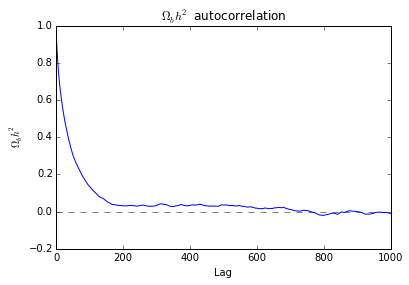

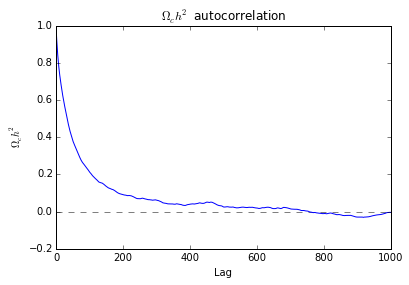

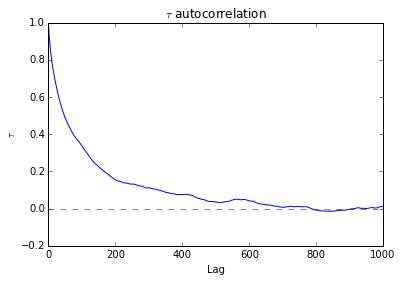

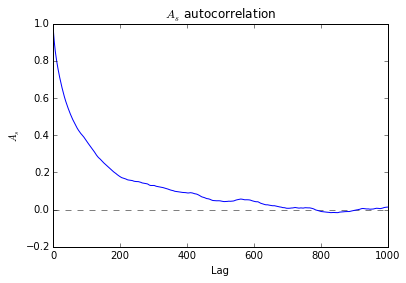

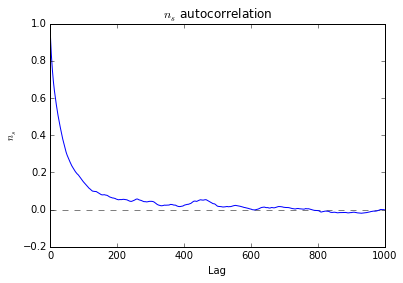

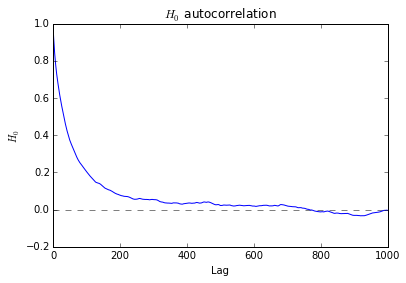

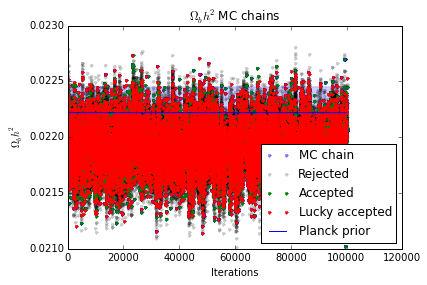

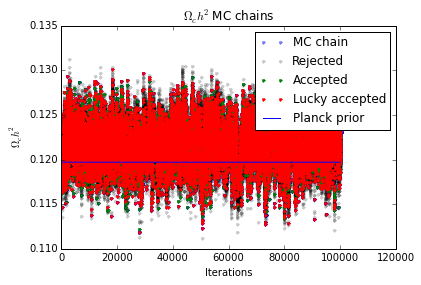

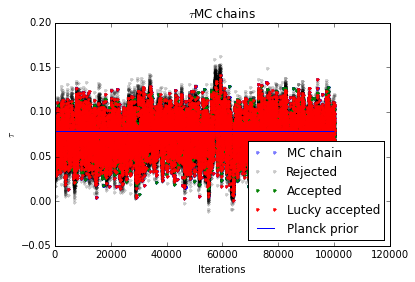

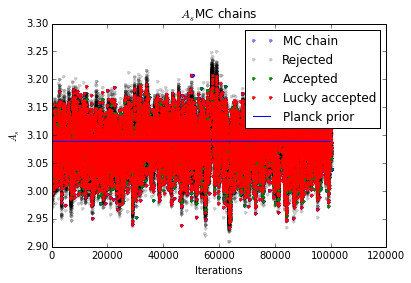

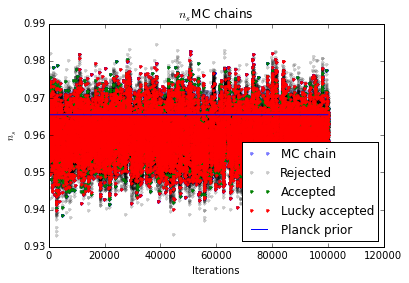

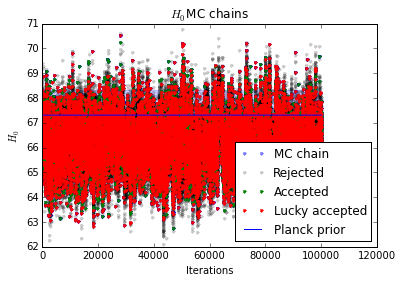

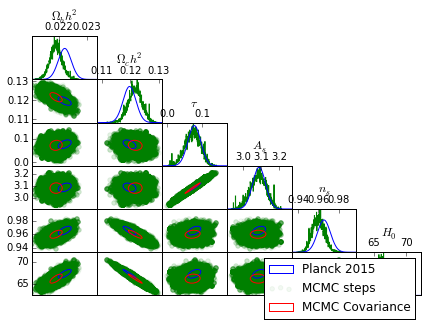

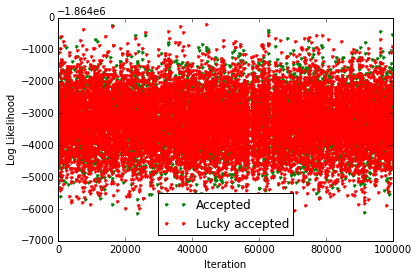

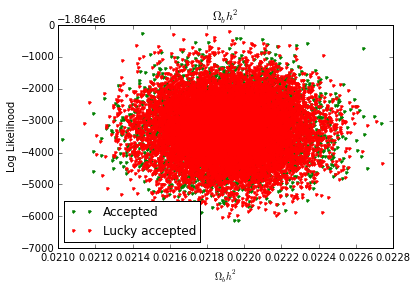

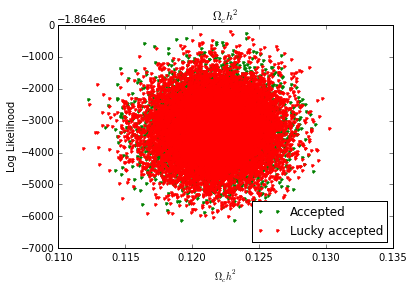

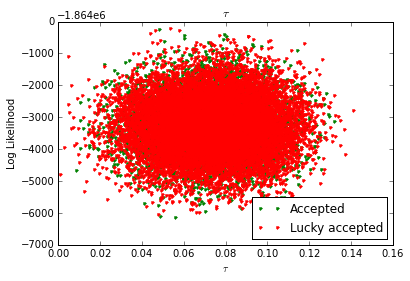

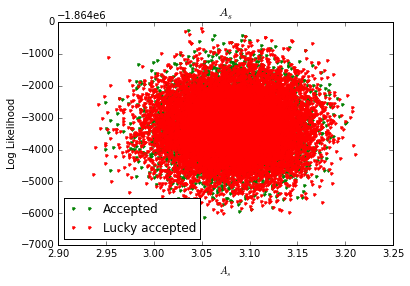

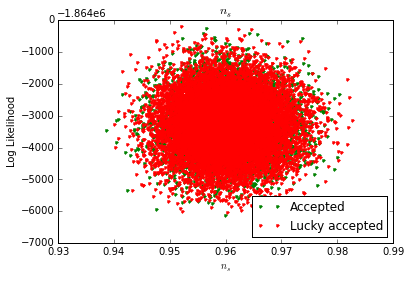

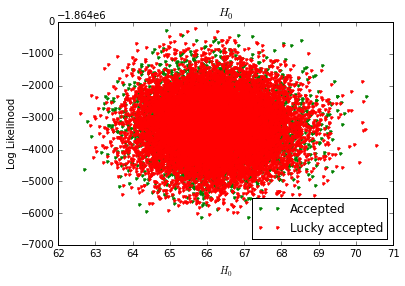

In [8]:
%run MH_MCMC_Jeff_idea.py
chain = np.load("../parameter_MCMC/chain_Jeff_idea_7arcmin_012345_98320_100000.npy")
import ploter_parameters as plp
plp.plot_all(chain,titles,[0,1,2,3,4,5],x_mean, cov_new, burnin_cut=50)
plt.show()

As we can see, the acceptance rate is lower than in the "exact case" and the correlation length longer. The triangle plot seems ok, but we need a better comparison to check if the two methods give similar results. 

Next plots show direct comparison at the marginals level.

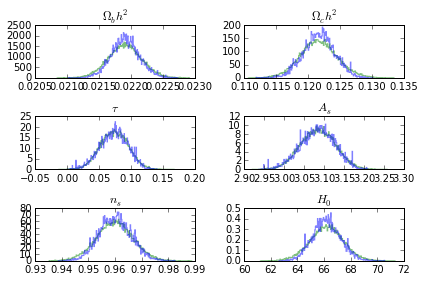

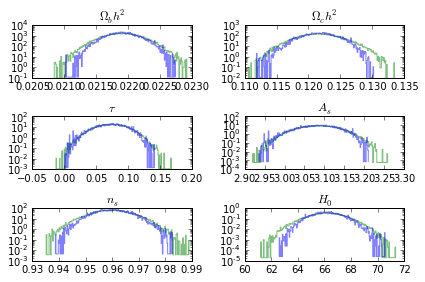

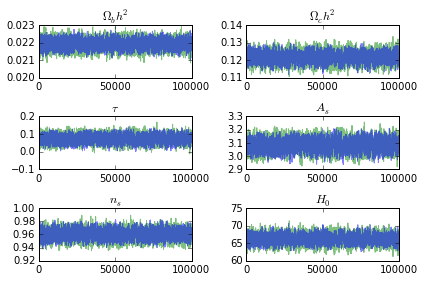

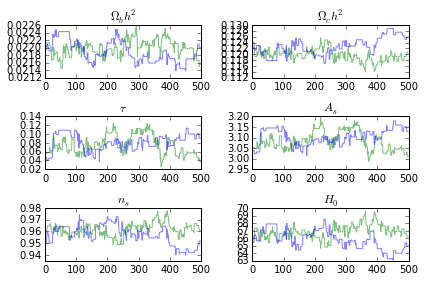

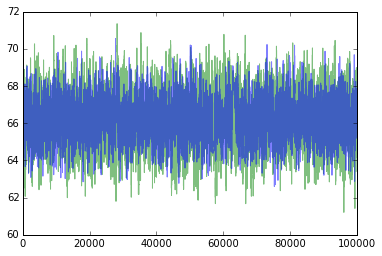

In [24]:
#%%capture
%run compare_chains.py


In [27]:
#print T.tabulate(table, header,tablefmt="pipe")


As we can see, the exact method "suffers" from heavy tails and has a higher variance. Here are the mean values and std for a more quantitative comparison.

|                     |   $\Omega_b h^2$ |   $\Omega_c h^2$ |      $\tau$ |      $A_s$ |       $n_s$ |       $H_0$ |
|:--------------------|-----------------:|-----------------:|------------:|-----------:|------------:|------------:|
| mean 'exact'        |      0.0219039   |       0.121678   |  0.0738254  |  3.08487   |  0.959885   | 66.1901     |
| mean 'new idea'     |      0.0219119   |       0.121699   |  0.073155   |  3.0835    |  0.960061   | 66.1863     |
| std 'exact'         |      0.000260813 |       0.00289083 |  0.0216179  |  0.0430557 |  0.00686194 |  1.25577    |
| std 'new idea'      |      0.000218261 |       0.00242251 |  0.0216219  |  0.0428885 |  0.00598711 |  1.04824    |
| std : 'exact'/'new' |      1.19496     |       1.19332    |  0.999816   |  1.0039    |  1.14612    |  1.19798    |
| skew : 'exact'      |      0.0226608   |       0.0910057  | -0.00532137 | -0.0103165 |  0.00161199 | -0.0351401  |
| skew : 'new idea'   |      0.0710784   |      -0.0852413  | -0.167427   | -0.171386  |  0.0946615  |  0.141363   |
| kurt : 'exact'      |      0.047803    |       0.0458776  | -0.16346    | -0.185568  |  0.0426156  |  0.0569011  |
| kurt : 'new idea'   |      0.0527585   |      -0.0113169  | -0.221916   | -0.145415  | -0.118444   |  0.00447249 |

#Check

A basic check of our new idea is to propose using the exact chains, i.e. from 

$w(\Omega_{i+1}) = \frac{e^{-\frac{1}{2} d (\;A S(\Omega)_i A^T + N\;)^{-1} d^T} }{\sqrt{2\pi \; \vert \; A S(\Omega)_i A^T + N \; \vert }}$. 


For that, we use the chains generated with the "exact method". 

The target distribution is $\Pi(\Omega_{i+1} \vert d) = e^{-\frac{1}{2} (d- A \hat{s}_{i+1}) N^{-1} (d- A \hat{s}_{i+1}) - \frac{1}{2} \hat{s}_{i+1} C_{i+1} \hat{s}_{i+1}}  $, 

WHY IS THAT SO ?


Then, A = min$[1,\frac{\Pi(\Omega_{i+1} \vert d)}{\Pi(\Omega_{i} \vert d)} \frac{w(\Omega_{i})}{w(\Omega_{i+1})} ]$ should be unity, and we have a unit acceptance.






In [22]:
%run check_newidea.py

dataset read
idx1 =  9554 , idx2 =  16043
(log) i+1 term =  -5.35510480404e-09
(log) i term   =  2.56113708019e-09
log(A) =  -7.91624188423e-09


Being then compared to a uniform random number between 0 and 1, we effectively have a unit acceptance. 